In [119]:
## Calculations of some basic features of the flow

Mean velocities, depth of upwelling, etc.

In [120]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib as mpl
%matplotlib inline
from math import *

from MITgcmutils import rdmds

import scipy.io

import scipy as spy

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [121]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [122]:
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonPtracers='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/ptracersGlob.nc'
CanyonPtracersOut = Dataset(CanyonPtracers)



In [123]:
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj

In [124]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
Time = CanyonStateOut.variables['T']

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacW = rout.getField(CanyonGrid, 'HFacW') # (Z,Y,Xp1) for zonal fluxes
MaskW = rout.getMask(CanyonGrid,'HFacW') 

hFacS = rout.getField(CanyonGrid, 'HFacS') # (Z,Yp1,X) for meridional fluxes
MaskS = rout.getMask(CanyonGrid,'HFacS') 

RhoRef = np.squeeze(rdmds('/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/RhoRef'))
 

/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run02/RhoRef.meta


In [125]:
# Load velocity components
uu = rout.getField(CanyonState,'U')
vv = rout.getField(CanyonState,'V')
W = rout.getField(CanyonState,'W')

U,V = rout.unstagger(uu,vv)


Mean velocity at all times from surface to shelf break depth

In [126]:
uplane = np.empty(np.shape(U[:,:29,:,1:]))
vplane = np.empty(np.shape(V[:,:29,1:,:]))

for ii in range(19):
    uplane[ii,:,:,:] = np.ma.array(U[ii,:29,:,1:],mask=MaskC[:29,1:,1:])
    vplane[ii,:,:,:] = np.ma.array(V[ii,:29,1:,:],mask=MaskC[:29,1:,1:])

spd = np.sqrt(uplane**2+vplane**2)

meancurrent = np.mean(np.mean(np.mean(spd,axis=1),axis=1),axis=1)
print('Mean current on shelf every half day [m/s]:' )
print(meancurrent)
print('------------------------------------------')
print('Mean current on shelf after day 3 [m/s]: ')
print(np.mean(meancurrent[6:]))



Mean current on shelf every half day [m/s]:
[ 0.          0.01334484  0.05119687  0.09818783  0.14153135  0.1691212
  0.17238708  0.1718059   0.17287365  0.17509431  0.17784612  0.1809052
  0.18419246  0.18764391  0.19122567  0.19487717  0.19853885  0.20221972
  0.20591833]
------------------------------------------
Mean current on shelf after day 3 [m/s]: 
0.185809875351


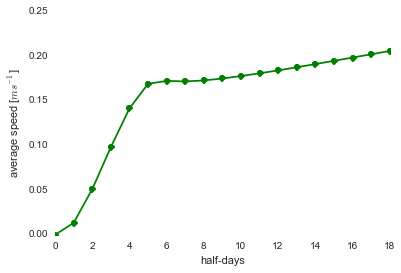

In [127]:
plt.plot(np.arange(19),meancurrent,'go-')
plt.xlabel('half-days')
plt.ylabel('average speed [$ms^{-1}$]')


In [128]:
def calcDensity(T,S,rhoref,alpha=2.0E-4,beta=7.4E-4):
    
    newrho=np.expand_dims(np.expand_dims(np.expand_dims(rhoref, axis=0),axis=2),axis = 3)
    newrho = np.repeat(newrho,19,axis=0)
    newrho = np.repeat(newrho,360,axis=2)
    newrho = np.repeat(newrho,360,axis=3)
    
    rho = newrho - newrho*(alpha*(T-T[0,...])) + nwerhobeta*S + rhoref
    return rho

In [129]:
T = rout.getField(CanyonState,'Temp')
S = rout.getField(CanyonState,'S')

In [130]:

dens = calcDensity(T[6,0,180,180],S[6,0,180,180],RhoRef[1])

ValueError: axis(=3) out of bounds

In [ ]:

rhorefMat = np.empty(np.shape(T))
newrho=np.expand_dims(np.expand_dims(np.expand_dims(RhoRef, axis=0),axis=2),axis = 3)
newrho = np.repeat(newrho,19,axis=0)
newrho = np.repeat(newrho,360,axis=2)
newrho = np.repeat(newrho,360,axis=3)

In [ ]:
np.shape(np.tile(RhoRef, (19,1,4,4)))